# Assignment 6



---


# **The Benchmark Experiment**

Tested neural network structures should be explored within a benchmark experiment, a factorial design with at least two levels on each of two experimental factors (at least a 2x2 completely crossed design). But due to the time required to fit each neural network, we will observe only one trial for each cell in the design.  You will build your models on train.csv and submit your forecasts for test.csv to Kaggle.com, providing your name and user ID for each experimental trial.

---


# Management Question

Suppose you are a financial institution evaluating machine learning technologies for optical character recognition. Initial testing is on the MNIST digits. What can you conclude from your benchmark study? Which neural network typology and hyperparameter settings would you recommend as being the most trustworthy?

# Import Libraries and Environment Setup

In [0]:
import os
from google.colab import drive    # To Mount Google drive
from google.colab import files    # To upload/downlod files from/to local drive
import time

# Data exploration and manipulation
import pandas as pd
import numpy as np
from scipy import stats as st


# Machine learning
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import RMSprop, adam
from keras.preprocessing.image import ImageDataGenerator

# Stable output across runs
RANDOM_SEED = 42

# Set number of classes in output layer
num_classes = 10

# Visuals
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Mount to my Google Drive

In [0]:
drive.mount('/content/gdrive')
from google.colab import drive


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Mount Kaggle

In [0]:
!pip install -U -q kaggle


In [0]:
!mkdir -p ~/.kaggle


In [0]:
!cp /content/gdrive/My\ Drive/kaggle.json ~/.kaggle/kaggle.json


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

### Access Datasets

In [0]:
# Download digit-recognizer data
!kaggle competitions download -c digit-recognizer --force

 92% 67.0M/73.2M [00:01<00:00, 29.0MB/s]
100% 73.2M/73.2M [00:01<00:00, 42.2MB/s]
 98% 48.0M/48.8M [00:00<00:00, 67.9MB/s]
100% 48.8M/48.8M [00:00<00:00, 82.9MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 73.2MB/s]


# Dataset

## Set Paths

In [0]:
# Train
train_path = "/content/train.csv"
train = pd.read_csv(train_path)
y = np.array(train["label"])
X = np.array(train.drop('label', 1))  #drop label variable

# Test
test_path = "/content/test.csv"
test = np.array(pd.read_csv(test_path))

In [0]:
print(X.shape)
print(test.shape)

(42000, 784)
(28000, 784)


## Inspect Data

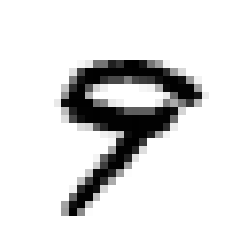

In [0]:
some_digit = X[121]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
#plt.show()

plt.savefig("some_digit.png")
#files.download("some_digit.png") 

In [0]:
y[121]

9

In [0]:
# Features
n_features_train = X.shape[0]
n_samples_train = X.shape[1]

n_features_test = test.shape[0]
n_samples_test = test.shape[1]
print("Training features, samples, ", X.shape)
print("Test features, samples, ", test.shape)

Training features, samples,  (42000, 784)
Test features, samples,  (28000, 784)


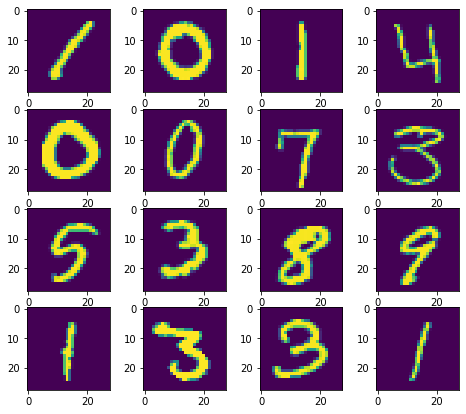

<Figure size 432x288 with 0 Axes>

In [0]:
def show_img(x):
    size_img = 28
    plt.figure(figsize=(8,7))
    num_images = 16
    n_samples = x.shape[0]
    x = x.reshape(n_samples, size_img, size_img)
    for i in range(num_images):
        plt.subplot(4, 4, i+1)
        plt.imshow(x[i])
    plt.show()

show_img(X)

plt.savefig("digitizer_samples.png")


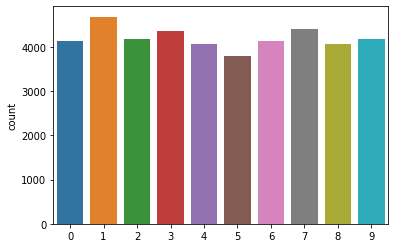

In [0]:
import seaborn as sns
sns.countplot(y)  

plt.savefig("countplot.png")


# Scale Data

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [0]:
# Normalize the data
X = StandardScaler().fit_transform(X)   

In [0]:
# Encode labels to one hot vectors
y = keras.utils.to_categorical(y, num_classes=10)

In [0]:
# Normalize the data
test = StandardScaler().fit_transform(test)

# Train-Test Split

In [0]:
from sklearn.model_selection import train_test_split

# Split train data path into training and validation sets at 80/20 ratio
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=RANDOM_SEED)


# Model Builds







## Benchmark Model

*   Zero hidden layers
*   Output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive)

> **File Submission: submission1a.csv**

> **Kaggle ID: abehzad**

> **Kaggle score: 0.9077**




In [0]:
# Start the clock
start = time.time()

# Create model
model = keras.models.Sequential()

# Add layers one by one
model.add(keras.layers.Dense(10,  activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data = (X_val, y_val), 
                    verbose = 2)


# Stop the clock and print elasped time
end = time.time()
print(end-start) #benchmark running time 

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 - 5s - loss: 0.4632 - acc: 0.8734 - val_loss: 0.3499 - val_acc: 0.9098
Epoch 2/10
37800/37800 - 4s - loss: 0.3178 - acc: 0.9183 - val_loss: 0.3603 - val_acc: 0.9162
Epoch 3/10
37800/37800 - 4s - loss: 0.2871 - acc: 0.9234 - val_loss: 0.3738 - val_acc: 0.9131
Epoch 4/10
37800/37800 - 4s - loss: 0.2707 - acc: 0.9260 - val_loss: 0.3982 - val_acc: 0.9119
Epoch 5/10
37800/37800 - 4s - loss: 0.2573 - acc: 0.9287 - val_loss: 0.4121 - val_acc: 0.9110
Epoch 6/10
37800/37800 - 4s - loss: 0.2477 - acc: 0.9324 - val_loss: 0.4252 - val_acc: 0.9143
Epoch 7/10
37800/37800 - 4s - loss: 0.2416 - acc: 0.9320 - val_loss: 0.4478 - val_acc: 0.9102
Epoch 8/10
37800/37800 - 4s - loss: 0.2390 - acc: 0.9334 - val_loss: 0.4626 - val_acc: 0.9107
Epoch 9/10
37800/37800 - 4s - loss: 0.2348 - acc: 0.9337 - val_loss: 0.4673 - val_acc: 0.9117
Epoch 10/10
37800/37800 - 4s - loss: 0.2330 - acc: 0.9343 - val_loss: 0.4888 - val_acc: 0.9088
42.3406610

### Fit and Evaluate 
Fit on training set and evaluate on validation set

In [0]:
# Create training prediction array
model.fit(X_train, y_train, epochs=10)

Train on 37800 samples
Epoch 1/10
37800/37800 [==============================] - 4s 115us/sample - loss: 0.2304 - acc: 0.9354
Epoch 2/10
37800/37800 [==============================] - 4s 114us/sample - loss: 0.2273 - acc: 0.9364
Epoch 3/10
37800/37800 [==============================] - 4s 111us/sample - loss: 0.2275 - acc: 0.9364
Epoch 4/10
37800/37800 [==============================] - 4s 109us/sample - loss: 0.2247 - acc: 0.9360
Epoch 5/10
37800/37800 [==============================] - 4s 112us/sample - loss: 0.2237 - acc: 0.9373
Epoch 6/10
37800/37800 [==============================] - 4s 112us/sample - loss: 0.2220 - acc: 0.9374
Epoch 7/10
37800/37800 [==============================] - 4s 116us/sample - loss: 0.2203 - acc: 0.9380
Epoch 8/10
37800/37800 [==============================] - 4s 113us/sample - loss: 0.2194 - acc: 0.9375
Epoch 9/10
37800/37800 [==============================] - 4s 114us/sample - loss: 0.2184 - acc: 0.9384
Epoch 10/10
37800/37800 [=========================

### Scoring and Plots

In [0]:
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100), "for traininig set")

scores_val = model.evaluate(X_val, y_val)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_val[1]*100), "for validation set")

37800/37800 [==============================] - 3s 91us/sample - loss: 0.1974 - acc: 0.9447

acc: 94.47% for traininig set
4200/4200 [==============================] - 0s 93us/sample - loss: 0.6003 - acc: 0.9043

acc: 90.43% for validation set


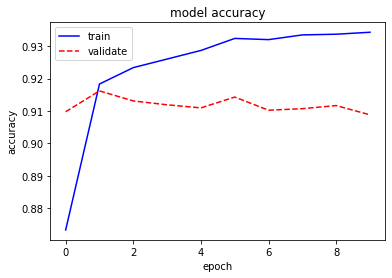

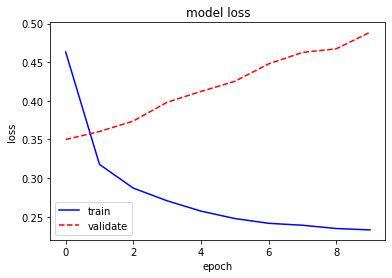

In [0]:
# List all data in history
##print(history.history.keys())
# Visualize history for accuracy
plt.plot(history.history['acc'], 'b-')
plt.plot(history.history['val_acc'], 'r--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'])
plt.show()

# Visualize history for loss
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'])
plt.show()


### As expected, the benchmark model predicts very poorly and begins to fit almost immediately. The lowest point of validation test error loss is around epoch 1, after which the training loss continues to decrease and the validation loss increases.

### Test

In [0]:
# Predict on test data set
benchmark_pred = model.predict(test)
benchmark_results = np.argmax(benchmark_pred, axis = 1)
benchmark_results = pd.Series(benchmark_results,name="Label")
benchmark_results = benchmark_results.reset_index(drop=False).rename(columns={'index':'ImageId'})
benchmark_results['ImageId'] = benchmark_results['ImageId'] + 1
print(benchmark_results.head())


   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      7
4        5      3


### Kaggle Submission for Benchmark NN



In [0]:
# Create csv for submission to kaggle
benchmark_results.to_csv('submission1a.csv')

# Submit to kaggle

# Download copy of csv to local drive
files.download("submission1a.csv")

print("\ncomplete")

## Model 1

> Two hidden layers:
*   1st: 300 neurons, ReLu activation
*   2nd: 100 neurons, ReLu activation

> Output layer with 10 neurons (one per class), Softmax activation 


> **File Submission: submission2a.csv**

> **Kaggle ID: abehzad**

> **Kaggle score: 0.967**





In [0]:
# Start the clock
start = time.time()

# Create model and pass a list of layers simultaneously
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data = (X_val, y_val), verbose = 2)    # Alternative to train-test split, set validation_split to the ratio of the training set that you want Keras to use for validation


# Stop the clock and print elasped time
end = time.time()
print(end-start) #benchmark running time 

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 - 5s - loss: 0.2461 - acc: 0.9286 - val_loss: 0.1671 - val_acc: 0.9464
Epoch 2/20
37800/37800 - 5s - loss: 0.1086 - acc: 0.9674 - val_loss: 0.1397 - val_acc: 0.9562
Epoch 3/20
37800/37800 - 5s - loss: 0.0657 - acc: 0.9796 - val_loss: 0.1509 - val_acc: 0.9583
Epoch 4/20
37800/37800 - 5s - loss: 0.0632 - acc: 0.9808 - val_loss: 0.1601 - val_acc: 0.9602
Epoch 5/20
37800/37800 - 5s - loss: 0.0445 - acc: 0.9860 - val_loss: 0.1529 - val_acc: 0.9669
Epoch 6/20
37800/37800 - 5s - loss: 0.0356 - acc: 0.9890 - val_loss: 0.1361 - val_acc: 0.9662
Epoch 7/20
37800/37800 - 5s - loss: 0.0413 - acc: 0.9880 - val_loss: 0.1488 - val_acc: 0.9679
Epoch 8/20
37800/37800 - 5s - loss: 0.0310 - acc: 0.9915 - val_loss: 0.2229 - val_acc: 0.9614
Epoch 9/20
37800/37800 - 5s - loss: 0.0283 - acc: 0.9915 - val_loss: 0.2361 - val_acc: 0.9648
Epoch 10/20
37800/37800 - 5s - loss: 0.0254 - acc: 0.9928 - val_loss: 0.2048 - val_acc: 0.9714
Epoch 11/2

### Fit and Evaluate 
Fit on training set and evaluate on validation set

In [0]:
# Create validation prediction array
model.evaluate(X_val, y_val)

4200/4200 [==============================] - 0s 103us/sample - loss: 0.4523 - acc: 0.9671


[0.4523396955387904, 0.9671429]

### Model Summary

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             multiple                  235500    
_________________________________________________________________
dense_17 (Dense)             multiple                  30100     
_________________________________________________________________
dense_18 (Dense)             multiple                  1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
for layer in model.layers:
  weights = model.layers[0].get_weights()[0]
  biases = model.layers[0].get_weights()[1]

print(pd.DataFrame(weights).head())
print(pd.DataFrame(biases).head())


        0         1         2    ...       297       298       299
0  0.032975 -0.039362 -0.057800  ... -0.064421  0.061435  0.019816
1 -0.054942  0.040101 -0.048212  ... -0.030490  0.005482  0.016717
2  0.067723  0.014183 -0.046585  ...  0.023599 -0.049788 -0.024327
3  0.018545  0.051511 -0.033693  ... -0.054176 -0.063106 -0.041657
4  0.024351 -0.000556  0.036626  ...  0.054670 -0.067196 -0.051901

[5 rows x 300 columns]
          0
0 -0.296310
1 -0.492880
2 -0.570377
3 -0.612846
4 -0.134037


### Scoring and Plots

In [0]:
model_1_scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100), "for traininig set")

model_1_scores_val = model.evaluate(X_val, y_val)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_val[1]*100), "for validation set")

37800/37800 [==============================] - 4s 105us/sample - loss: 0.0340 - acc: 0.9941

acc: 94.47% for traininig set
4200/4200 [==============================] - 0s 98us/sample - loss: 0.4523 - acc: 0.9671

acc: 90.43% for validation set


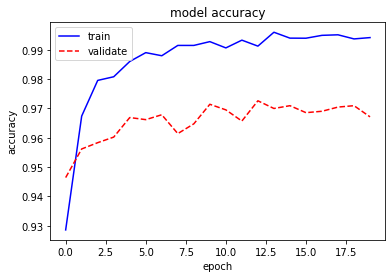

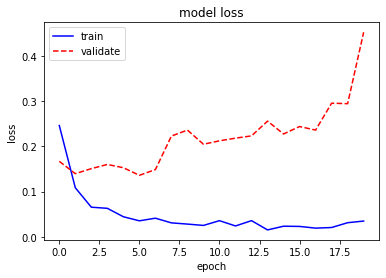

In [0]:
# List all data in history
##print(history.history.keys())
# Visualize history for accuracy
plt.plot(history.history['acc'], 'b-')
plt.plot(history.history['val_acc'], 'r--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'])
plt.show()

# Visualize history for loss
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'])
plt.show()

### Model_1 also predicts very poorly and begins to overfit very quickly. The lowest point of validation test error loss is around epoch 5, after which the training loss continues to decrease and the validation loss increases. 


> Model_1 is only slightly better than the benchmark model



### Test Set Predictions

In [0]:
# Predict on test data set
model_1_pred = model.predict(test)
results_1 = np.argmax(model_1_pred, axis = 1)
results_1 = pd.Series(results_1, name="Label")
results_1 = results_1.reset_index(drop=False).rename(columns={'index':'ImageId'})
results_1['ImageId'] = results_1['ImageId'] + 1
print(results_1.head())

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3


### Kaggle Submission for Model 1



In [0]:
# Create csv for submission to kaggle
results_1.to_csv('submission2a.csv')



In [0]:
# Download copy of csv to local drive
files.download("submission2a.csv")

print("\ncomplete")

## Model 2

> Two hidden layers:
*   1st: 32 neurons, ReLu activation
*   2nd: 64 neurons, ReLu activation

> Use of 25% Dropout to reduce overfitting

> Output layer with 10 neurons (one per class), Softmax activation 

> **File Submission: submission3a.csv**

> **Kaggle ID: abehzad**

> **Kaggle score: 0.967**

In [0]:
# Start the clock
start = time.time()

# Create model and pass a list of layers simultaneously
model_2 = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(.25),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

#compile model using accuracy to measure model performance
model_2.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#train the model
history = model_2.fit(X_train, y_train,
                    batch_size=128,
                    epochs=20, 
                    validation_data = (X_val, y_val), 
                    verbose = 2)    # Alternative to train-test split, set validation_split to the ratio of the training set that you want Keras to use for validation


# Stop the clock and print elasped time
end = time.time()
print(end-start) #benchmark running time 

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 - 2s - loss: 0.6735 - acc: 0.7892 - val_loss: 0.2872 - val_acc: 0.9136
Epoch 2/20
37800/37800 - 1s - loss: 0.3449 - acc: 0.8953 - val_loss: 0.2337 - val_acc: 0.9293
Epoch 3/20
37800/37800 - 1s - loss: 0.2926 - acc: 0.9097 - val_loss: 0.2090 - val_acc: 0.9367
Epoch 4/20
37800/37800 - 1s - loss: 0.2582 - acc: 0.9195 - val_loss: 0.1957 - val_acc: 0.9410
Epoch 5/20
37800/37800 - 1s - loss: 0.2433 - acc: 0.9255 - val_loss: 0.1984 - val_acc: 0.9386
Epoch 6/20
37800/37800 - 1s - loss: 0.2281 - acc: 0.9292 - val_loss: 0.1798 - val_acc: 0.9445
Epoch 7/20
37800/37800 - 1s - loss: 0.2161 - acc: 0.9312 - val_loss: 0.1746 - val_acc: 0.9483
Epoch 8/20
37800/37800 - 1s - loss: 0.2060 - acc: 0.9338 - val_loss: 0.1687 - val_acc: 0.9495
Epoch 9/20
37800/37800 - 1s - loss: 0.1951 - acc: 0.9373 - val_loss: 0.1637 - val_acc: 0.9512
Epoch 10/20
37800/37800 - 1s - loss: 0.1901 - acc: 0.9401 - val_loss: 0.1799 - val_acc: 0.9510
Epoch 11/2

### Fit and Evaluate 
Fit on training set and evaluate on validation set

In [0]:
# Create validation array
model_2.evaluate(X_val, y_val)

4200/4200 [==============================] - 0s 95us/sample - loss: 0.1688 - acc: 0.9569


[0.1688149389979385, 0.95690477]

### Model Summary

In [0]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             multiple                  25120     
_________________________________________________________________
dropout_5 (Dropout)          multiple                  0         
_________________________________________________________________
dense_20 (Dense)             multiple                  2112      
_________________________________________________________________
dense_21 (Dense)             multiple                  650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [0]:
for layer in model_2.layers:
  weights = model_2.layers[0].get_weights()[0]
  biases = model_2.layers[0].get_weights()[1]

print(pd.DataFrame(weights).head())
print(pd.DataFrame(biases).head())


         0         1         2   ...        29        30        31
0  0.074079 -0.021223 -0.057669  ...  0.009085 -0.072858  0.085365
1 -0.053362 -0.003134  0.050854  ...  0.046253 -0.085677 -0.028339
2  0.012178  0.040556 -0.012199  ...  0.062031 -0.085050 -0.055452
3 -0.010075  0.022986 -0.063278  ...  0.015600 -0.001529  0.032427
4  0.066143 -0.055524 -0.006619  ...  0.058191 -0.075936  0.028776

[5 rows x 32 columns]
          0
0 -0.469973
1 -0.458841
2 -0.231131
3 -0.003599
4 -0.463951


### Scoring and Plots

In [0]:
model_2_scores = model_2.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model_2.metrics_names[1], model_2_scores[1]*100), "for traininig set")

model_2_scores_val = model_2.evaluate(X_val, y_val)
print("\n%s: %.2f%%" % (model.metrics_names[1], model_2_scores_val[1]*100), "for validation set")

37800/37800 [==============================] - 4s 101us/sample - loss: 0.0582 - acc: 0.9828

acc: 98.28% for traininig set
4200/4200 [==============================] - 0s 109us/sample - loss: 0.1688 - acc: 0.9569

acc: 95.69% for validation set


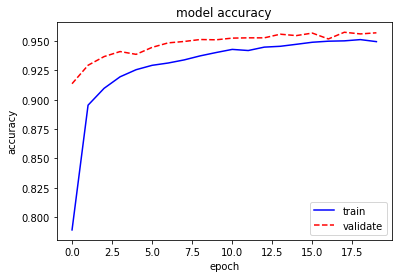

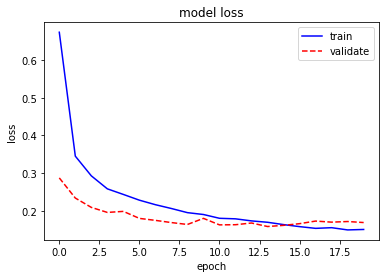

In [0]:
# List all data in history
##print(history.history.keys())
# Visualize history for accuracy
plt.plot(history.history['acc'], 'b-')
plt.plot(history.history['val_acc'], 'r--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'])
plt.show()

# Visualize history for loss
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'])
plt.show()

### Model_2 is showing improvement but still prone to overfit. The lowest point of validation test error loss is around epoch 7, after which the training loss continues to decrease and the validation loss slightly increases. 


> Model_2 is an improvement over previous models but more tuning is needed



### Test Set Predictions

In [0]:
# Predict on test data set
model_2_pred = model_2.predict(test)
results_2 = np.argmax(model_2_pred, axis = 1)
results_2 = pd.Series(results_2, name="Label")
results_2 = results_2.reset_index(drop=False).rename(columns={'index':'ImageId'})
results_2['ImageId'] = results_2['ImageId'] + 1
print(results_2.head())


   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3


### Kaggle Submission for Model 2



In [0]:
# Create csv for submission to kaggle
results_2.to_csv('submission3a.csv')



In [0]:
# Download copy of csv to local drive
files.download("submission3a.csv")

print("\ncomplete")

## Model 3

> Three hidden layers:
*   1st: 300 neurons, ReLu activation
*   2nd: 300 neurons, ReLu activation
*   3rd: 100 neurons, Relu activation

> Use of 25% Dropout to reduce overfitting

> Output layer with 10 neurons (one per class), Softmax activation 

> **File Submission: submission3a.csv**

> **Kaggle ID: abehzad**

> **Kaggle score: 0.972**

In [0]:
# Start the clock
start = time.time()

# Create model and pass a list of layers simultaneously
model_3 = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(.25),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(.25),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

#compile model using accuracy to measure model performance
model_3.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#train the model
history = model_3.fit(X_train, y_train,
                    batch_size=128,
                    epochs=20, 
                    validation_data = (X_val, y_val), 
                    verbose = 2)    # Alternative to train-test split, set validation_split to the ratio of the training set that you want Keras to use for validation


# Stop the clock and print elasped time
end = time.time()
print(end-start) #benchmark running time 

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 - 2s - loss: 0.3924 - acc: 0.8827 - val_loss: 0.1734 - val_acc: 0.9455
Epoch 2/20
37800/37800 - 2s - loss: 0.1784 - acc: 0.9448 - val_loss: 0.1302 - val_acc: 0.9595
Epoch 3/20
37800/37800 - 2s - loss: 0.1340 - acc: 0.9583 - val_loss: 0.1377 - val_acc: 0.9574
Epoch 4/20
37800/37800 - 2s - loss: 0.1151 - acc: 0.9647 - val_loss: 0.1190 - val_acc: 0.9643
Epoch 5/20
37800/37800 - 2s - loss: 0.1003 - acc: 0.9678 - val_loss: 0.1110 - val_acc: 0.9648
Epoch 6/20
37800/37800 - 2s - loss: 0.0900 - acc: 0.9714 - val_loss: 0.1054 - val_acc: 0.9674
Epoch 7/20
37800/37800 - 2s - loss: 0.0734 - acc: 0.9765 - val_loss: 0.1015 - val_acc: 0.9683
Epoch 8/20
37800/37800 - 2s - loss: 0.0622 - acc: 0.9795 - val_loss: 0.1009 - val_acc: 0.9710
Epoch 9/20
37800/37800 - 2s - loss: 0.0602 - acc: 0.9808 - val_loss: 0.0981 - val_acc: 0.9710
Epoch 10/20
37800/37800 - 2s - loss: 0.0541 - acc: 0.9819 - val_loss: 0.1024 - val_acc: 0.9693
Epoch 11/2

### Fit and Evaluate 
Fit on training set and evaluate on validation set

In [0]:
# Create validation array
model_3.evaluate(X_val, y_val)

4200/4200 [==============================] - 0s 103us/sample - loss: 0.1280 - acc: 0.9707


[0.12795127496762213, 0.9707143]

### Model Summary

In [0]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             multiple                  235500    
_________________________________________________________________
dropout_6 (Dropout)          multiple                  0         
_________________________________________________________________
dense_23 (Dense)             multiple                  90300     
_________________________________________________________________
dropout_7 (Dropout)          multiple                  0         
_________________________________________________________________
dense_24 (Dense)             multiple                  30100     
_________________________________________________________________
dense_25 (Dense)             multiple                  1010      
Total params: 356,910
Trainable params: 356,910
Non-trainable params: 0
________________________________________________

In [0]:
for layer in model_3.layers:
  weights = model_3.layers[0].get_weights()[0]
  biases = model_3.layers[0].get_weights()[1]

print(pd.DataFrame(weights).head())
print(pd.DataFrame(biases).head())


        0         1         2    ...       297       298       299
0  0.063519  0.051163  0.019505  ...  0.017953  0.009525 -0.021476
1 -0.031999  0.026241  0.073158  ... -0.060296 -0.025032  0.027198
2  0.047363 -0.031218  0.037801  ... -0.008933  0.023954 -0.054775
3  0.001551  0.031048 -0.055302  ... -0.007246 -0.018587  0.055777
4  0.026827 -0.024226 -0.060883  ...  0.036220  0.032403  0.020958

[5 rows x 300 columns]
          0
0 -0.245800
1 -0.214290
2 -0.242046
3 -0.346462
4 -0.169119


### Scoring and Plots

In [0]:
model_3_scores = model_3.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model_3.metrics_names[1], model_3_scores[1]*100), "for traininig set")

model_3_scores_val = model_3.evaluate(X_val, y_val)
print("\n%s: %.2f%%" % (model.metrics_names[1], model_3_scores_val[1]*100), "for validation set")

37800/37800 [==============================] - 4s 113us/sample - loss: 0.0077 - acc: 0.9978

acc: 99.78% for traininig set
4200/4200 [==============================] - 1s 122us/sample - loss: 0.1280 - acc: 0.9707

acc: 97.07% for validation set


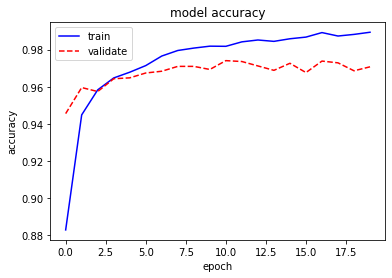

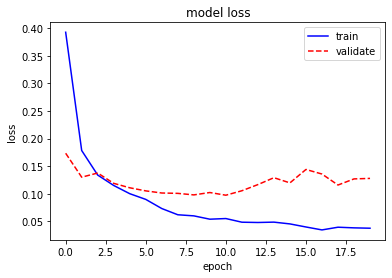

In [0]:
# List all data in history
##print(history.history.keys())
# Visualize history for accuracy
plt.plot(history.history['acc'], 'b-')
plt.plot(history.history['val_acc'], 'r--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'])
plt.show()

# Visualize history for loss
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'])
plt.show()

### Model_3 predicts quite accurately until late in the epochs when it begins to overfit. The lowest point of validation test error loss is around epoch 12, after which the training loss continues to decrease and the validation loss increases. 


> Model_3 is quite an improvement but the model remains prone to overfitting



### Test Set Predictions

In [0]:
# Predict on test data set
model_3_pred = model_3.predict(test)
results_3 = np.argmax(model_3_pred, axis = 1)
results_3 = pd.Series(results_3,name="Label")
results_3 = results_3.reset_index(drop=False).rename(columns={'index':'ImageId'})
results_3['ImageId'] = results_3['ImageId'] + 1
print(results_3.head())


   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3


### Kaggle Submission for Model 3



In [0]:
# Create csv for submission to kaggle
results_3.to_csv('submission4.csv')


In [0]:
# Download copy of csv to local drive
files.download("submission4.csv")

print("\ncomplete")

## Model 4 

> Three hidden layers:
*   1st: 300 neurons, ReLu activation
*   2nd: 100 neurons, ReLu activation
*   3rd: 100 neurons, ReLu activation
*   4th: 64 neurons, ReLu activation
*   5th: 32 neurons, ReLu activation

> Use of 25% Dropout to reduce overfitting

> Output layer with 10 neurons (one per class), Softmax activation 

> **File Submission: submission5.csv**

> **Kaggle ID: abehzad**

> **Kaggle score: 0.968**

In [0]:
# Start 
start = time.time()

model_4 = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(.25),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(.25),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(.25),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(.25),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_4.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model_4.fit(X_train, y_train,
                    batch_size=128,
                    epochs=20, 
                    validation_data = (X_val, y_val), 
                    verbose = 2)    


# Stop 
end = time.time()
print(end-start)  

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 - 3s - loss: 0.7306 - acc: 0.7718 - val_loss: 0.2452 - val_acc: 0.9314
Epoch 2/20
37800/37800 - 2s - loss: 0.3006 - acc: 0.9165 - val_loss: 0.2082 - val_acc: 0.9400
Epoch 3/20
37800/37800 - 2s - loss: 0.2370 - acc: 0.9382 - val_loss: 0.1705 - val_acc: 0.9493
Epoch 4/20
37800/37800 - 2s - loss: 0.1952 - acc: 0.9475 - val_loss: 0.1585 - val_acc: 0.9519
Epoch 5/20
37800/37800 - 2s - loss: 0.1668 - acc: 0.9539 - val_loss: 0.1526 - val_acc: 0.9598
Epoch 6/20
37800/37800 - 2s - loss: 0.1508 - acc: 0.9595 - val_loss: 0.1363 - val_acc: 0.9617
Epoch 7/20
37800/37800 - 2s - loss: 0.1355 - acc: 0.9625 - val_loss: 0.1195 - val_acc: 0.9662
Epoch 8/20
37800/37800 - 2s - loss: 0.1248 - acc: 0.9655 - val_loss: 0.1284 - val_acc: 0.9617
Epoch 9/20
37800/37800 - 2s - loss: 0.1104 - acc: 0.9685 - val_loss: 0.1323 - val_acc: 0.9652
Epoch 10/20
37800/37800 - 2s - loss: 0.1014 - acc: 0.9726 - val_loss: 0.1204 - val_acc: 0.9674
Epoch 11/2

### Fit and Evaluate 
Fit on training set and evaluate on validation set

In [0]:
# Create validation array
model_4.evaluate(X_val, y_val)

4200/4200 [==============================] - 1s 123us/sample - loss: 0.1242 - acc: 0.9707


[0.12417787450698338, 0.9707143]

### Model Summary

In [0]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             multiple                  235500    
_________________________________________________________________
dropout_8 (Dropout)          multiple                  0         
_________________________________________________________________
dense_27 (Dense)             multiple                  30100     
_________________________________________________________________
dropout_9 (Dropout)          multiple                  0         
_________________________________________________________________
dense_28 (Dense)             multiple                  10100     
_________________________________________________________________
dropout_10 (Dropout)         multiple                  0         
_________________________________________________________________
dense_29 (Dense)             multiple                 

In [0]:
for layer in model_4.layers:
  weights = model_4.layers[0].get_weights()[0]
  biases = model_4.layers[0].get_weights()[1]

print(pd.DataFrame(weights).head())
print(pd.DataFrame(biases).head())


        0         1         2    ...       297       298       299
0 -0.066508 -0.040639  0.000471  ... -0.001237 -0.029258 -0.001873
1  0.073246  0.015473  0.038053  ... -0.069338  0.004974 -0.043374
2 -0.046412 -0.068734  0.043264  ... -0.071396 -0.003564 -0.051695
3 -0.036481 -0.038470  0.031820  ...  0.006234 -0.018381  0.028593
4 -0.002993 -0.022906  0.047491  ...  0.016385  0.062497  0.059038

[5 rows x 300 columns]
          0
0 -0.310352
1 -0.217276
2 -0.338780
3 -0.175422
4 -0.277460


### Scoring and Plots

In [0]:
model_4_scores = model_4.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model_4.metrics_names[1], model_4_scores[1]*100), "for traininig set")

model_4_scores_val = model.evaluate(X_val, y_val)
print("\n%s: %.2f%%" % (model_4.metrics_names[1], model_4_scores_val[1]*100), "for validation set")

37800/37800 [==============================] - 5s 125us/sample - loss: 0.0160 - acc: 0.9953

acc: 99.53% for traininig set
4200/4200 [==============================] - 0s 111us/sample - loss: 0.4523 - acc: 0.9671

acc: 96.71% for validation set


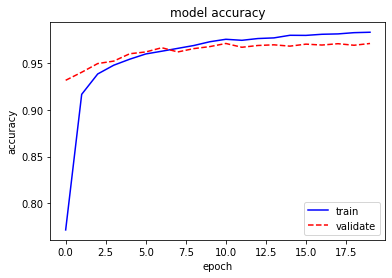

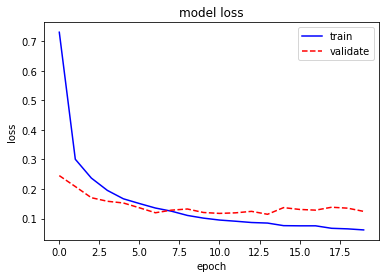

In [0]:
# List all data in history
##print(history.history.keys())
# Visualize history for accuracy
plt.plot(history.history['acc'], 'b-')
plt.plot(history.history['val_acc'], 'r--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'])
plt.show()

# Visualize history for loss
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'])
plt.show()

### Model_3 predicts quite accurately until late in the epochs when it begins to overfit. The lowest point of validation test error loss is around epoch 12, after which the training loss continues to decrease and the validation loss increases. 


> Model_3 is quite an improvement but the model remains prone to overfitting



### Test Set Predictions

In [0]:
# Predict on test data set
model_4_pred = model_4.predict(test)
results_4 = np.argmax(model_4_pred, axis = 1)
results_4 = pd.Series(results_4,name="Label")
results_4 = results_4.reset_index(drop=False).rename(columns={'index':'ImageId'})
results_4['ImageId'] = results_4['ImageId'] + 1
print(results_4.head())


   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3


### Kaggle Submission for Model 4



In [0]:
# Create csv for submission to kaggle
results_4.to_csv('submission5.csv')


In [0]:
# Download copy of csv to local drive
files.download("submission5.csv")

print("\ncomplete")

### Model_3 predicts quite accurately until late in the epochs when it begins to overfit. The lowest point of validation test error loss is around epoch 12, after which the training loss continues to decrease and the validation loss increases. 


> Model_3 is quite an improvement but the model remains prone to overfitting



# Conclusion 

Suppose you are a financial institution evaluating machine learning technologies for optical character recognition. Initial testing is on the MNIST digits. What can you conclude from your benchmark study? Which neural network typology and hyperparameter settings would you recommend as being the most trustworthy?